In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def plotResults(folder_name, stats=[]):
  def getAllFromDict(key, listOfDicts):
    return [d[key] for d in listOfDicts]

  
  RESULTS_PATH = '/home/sam/ray_results'
  SAMPLER_KEYS = [
    'episode_reward_max',
    'episode_reward_min',
    'episode_reward_mean'
    ]
  LEARNER_KEYS = [
    'mean_q',
    'mean_td_error'
  ]
  
  
  file = open(f"{RESULTS_PATH}/{folder_name}/result.json", "r")

  results = []
  for line in file:
    results.append(json.loads(line))
    
  file.close()
  
  history = []

  for epoch in results:
    epoch_data = {}
    
    sampler = epoch['sampler_results']
    learner = epoch['info']['learner']['default_policy']['learner_stats']
    
    if 'REWARD' in stats:
      for key in SAMPLER_KEYS:
        epoch_data[key] = sampler[key]
    if 'LEARNER' in stats:
      for key in LEARNER_KEYS:
        epoch_data[key] = learner[key]
    
    history.append(epoch_data)
  
  
  #PLOTTING 
  
  fig, axs = plt.subplots(2,constrained_layout=True)
  
  if 'REWARD' in stats:
    
    for key in SAMPLER_KEYS:
      axs[0].plot(getAllFromDict(key, history), label=key)
    
    axs[0].legend(bbox_to_anchor=(1,1))
    axs[0].set(xlabel="Epoch", ylabel="Reward", title="Reward Stats")
  
  if 'LEARNER' in stats:
    for key in LEARNER_KEYS:
      axs[1].plot(getAllFromDict(key, history), label=key)
    
    axs[1].legend(bbox_to_anchor=(1,1))
    axs[1].set(xlabel="Epoch", ylabel="Value", title="Learner Stats")
  # fig.tight_layout()
  fig.suptitle(folder_name)
  plt.show()



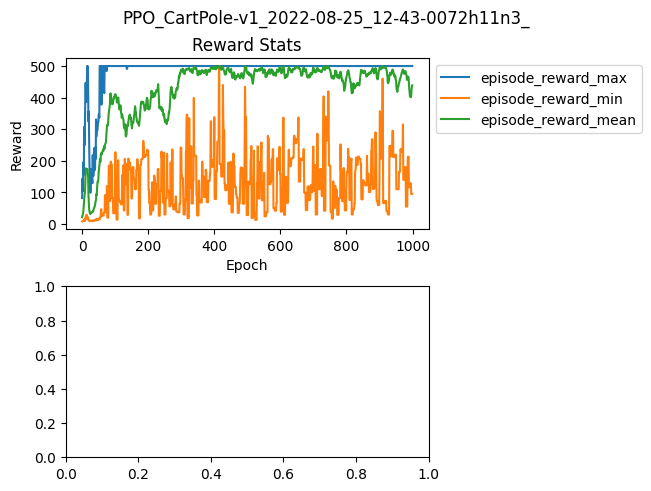

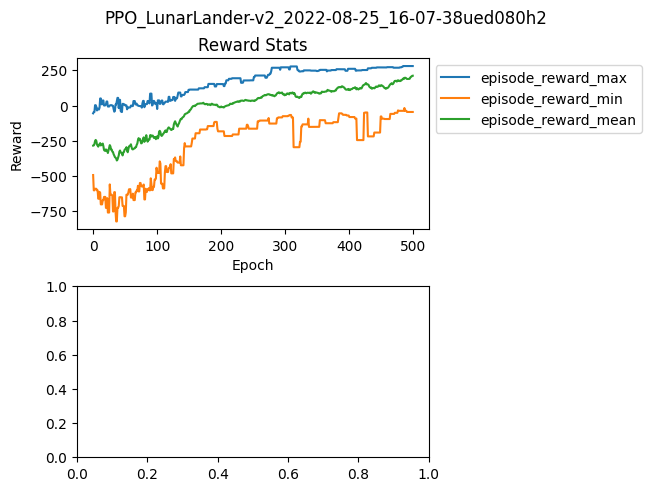

In [21]:
FOLDER_NAMES = [
    # "PPO_CartPole-v1_2022-08-25_11-41-16_9_8oyaq",
    # "PPO_CartPole-v1_2022-08-25_12-13-0843xz6def",
    "PPO_CartPole-v1_2022-08-25_12-43-0072h11n3_",
    "PPO_LunarLander-v2_2022-08-25_16-07-38ued080h2",
]

for folder in FOLDER_NAMES:
    plotResults(folder, ['REWARD'])

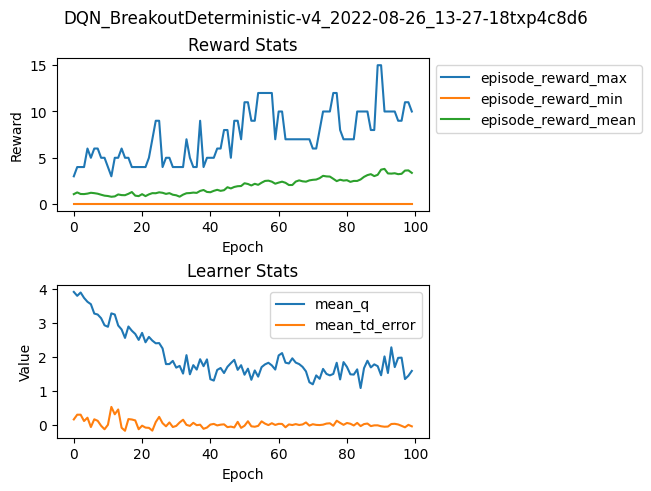

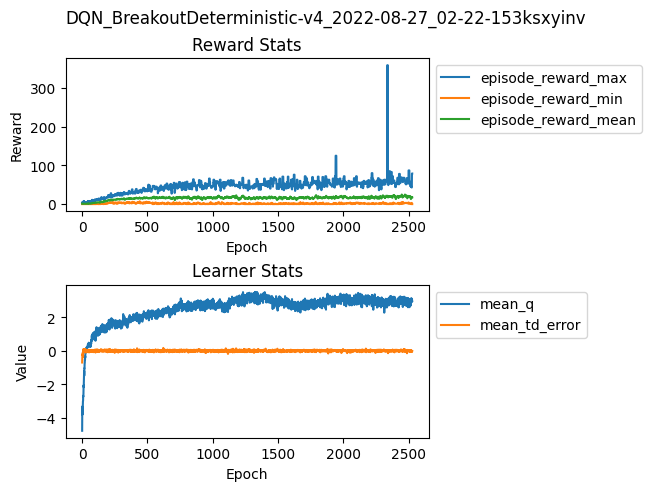

In [18]:
FOLDER_NAMES = [
    # "PPO_CartPole-v1_2022-08-25_11-41-16_9_8oyaq",
    # "PPO_CartPole-v1_2022-08-25_12-13-0843xz6def",
    # "PPO_CartPole-v1_2022-08-25_12-43-0072h11n3_",
    # "PPO_LunarLander-v2_2022-08-25_16-07-38ued080h2",
    "DQN_BreakoutDeterministic-v4_2022-08-26_13-27-18txp4c8d6",
    "DQN_BreakoutDeterministic-v4_2022-08-27_02-22-153ksxyinv"
]

for folder in FOLDER_NAMES:
    plotResults(folder, ['REWARD', 'LEARNER'])
